In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/breast-cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

B 357
M 212


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


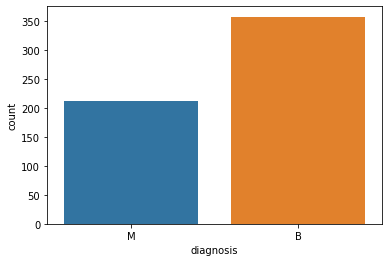

In [5]:
count_plot=sns.countplot(df['diagnosis'],label='Count')
B,M = df['diagnosis'].value_counts()    
print("B",B)
print("M",M)


In [6]:
X=df.drop(columns='diagnosis')
Y=df['diagnosis']
print("Shape of X", X.shape)
print("Shape of Y", Y.shape)

Shape of X (569, 31)
Shape of Y (569,)


In [7]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
EY=LE.fit_transform(Y)

In [8]:
#spliting data intro train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,EY, test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(x_train)
sc_xtest=sc.transform(x_test)

In [10]:
sc_xtest

array([[-0.23302946, -0.20175604,  0.3290786 , ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.16462369, -0.25555773,  1.46763319, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.23308188, -0.02619262, -0.8407682 , ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [-0.23309203,  1.71811488,  0.09318356, ...,  1.57630515,
         0.20317063, -0.15406178],
       [-0.23302022,  1.18859296,  0.34352115, ...,  0.56019755,
         0.26991966, -0.27320074],
       [-0.23303638,  0.26263752, -0.58080224, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [11]:
sc_xtrain

array([[-0.23317811, -1.15036482, -0.39064196, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.23991409, -0.93798972,  0.68051405, ..., -0.60687023,
         0.09669004, -0.38615797],
       [-0.23311711,  0.574121  , -1.03333557, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [ 7.27895613, -1.32422924, -0.20048168, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-0.23336823, -1.24380987, -0.2245526 , ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.23294935, -0.73694129,  1.14989702, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [12]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [14]:
#input and first hidden layer 
classifier=Sequential()
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=31))

#second hidden layer 
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))


#output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))


In [15]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
classifier.fit(sc_xtrain, y_train, batch_size=100, epochs=150)


Epoch 1/150
5/5 [==============================] - 1s 4ms/step - loss: 0.6927 - accuracy: 0.5758
Epoch 2/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.6374
Epoch 3/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.6374
Epoch 4/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.6374
Epoch 5/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6794 - accuracy: 0.6374
Epoch 6/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6712 - accuracy: 0.6374
Epoch 7/150
5/5 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.6374
Epoch 8/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6435 - accuracy: 0.6418
Epoch 9/150
5/5 [==============================] - 0s 6ms/step - loss: 0.6228 - accuracy: 0.6791
Epoch 10/150
5/5 [==============================] - 0s 3ms/step - loss: 0.5957 - accuracy: 0.7516
Epoch 11/150
5/5 [===========

In [17]:
pred=classifier.predict(x_test)
pred=(pred>0.5)

4/4 [==============================] - 0s 5ms/step


<AxesSubplot:>

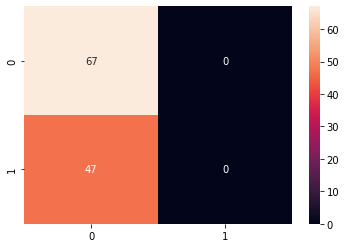

In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm, annot=True)
